In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
# Load the dataset
df = pd.read_csv('/content/ElectricCarData_Clean.csv')

# Check the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values or impute them based on your analysis
# For example, you can drop rows with missing values:
df.dropna(inplace=True)

# Check the data types of each column
print(df.dtypes)


         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
count  103.000000    103.000000  103.000000       103.000000  103.000000   
mean     7.396117    179.194175  338.786408       189.165049    4.883495   
std      3.017430     43.573030  126.014444        29.566839    0.795834   
min      2.100000    123.000000   95.000000       104.000000    2.000000   
25%      5.100000    150.000000  250.000000       168.000000    5.000000   
50%      7.300000    160.000000  340.000000       180.000000    5.000000   
75%      9.000000    200.000000  400.000000       203.000000    5.000000   
max     22.400000    410.000000  970.000000       273.000000    7.000000   

           PriceEuro  
count     103.000000  
mean    55811.563107  
std     34134.665280  
min     20129.000000  
25%     34429.500000  
50%     45000.000000  
75%     65000.000000  
max    215000.000000  


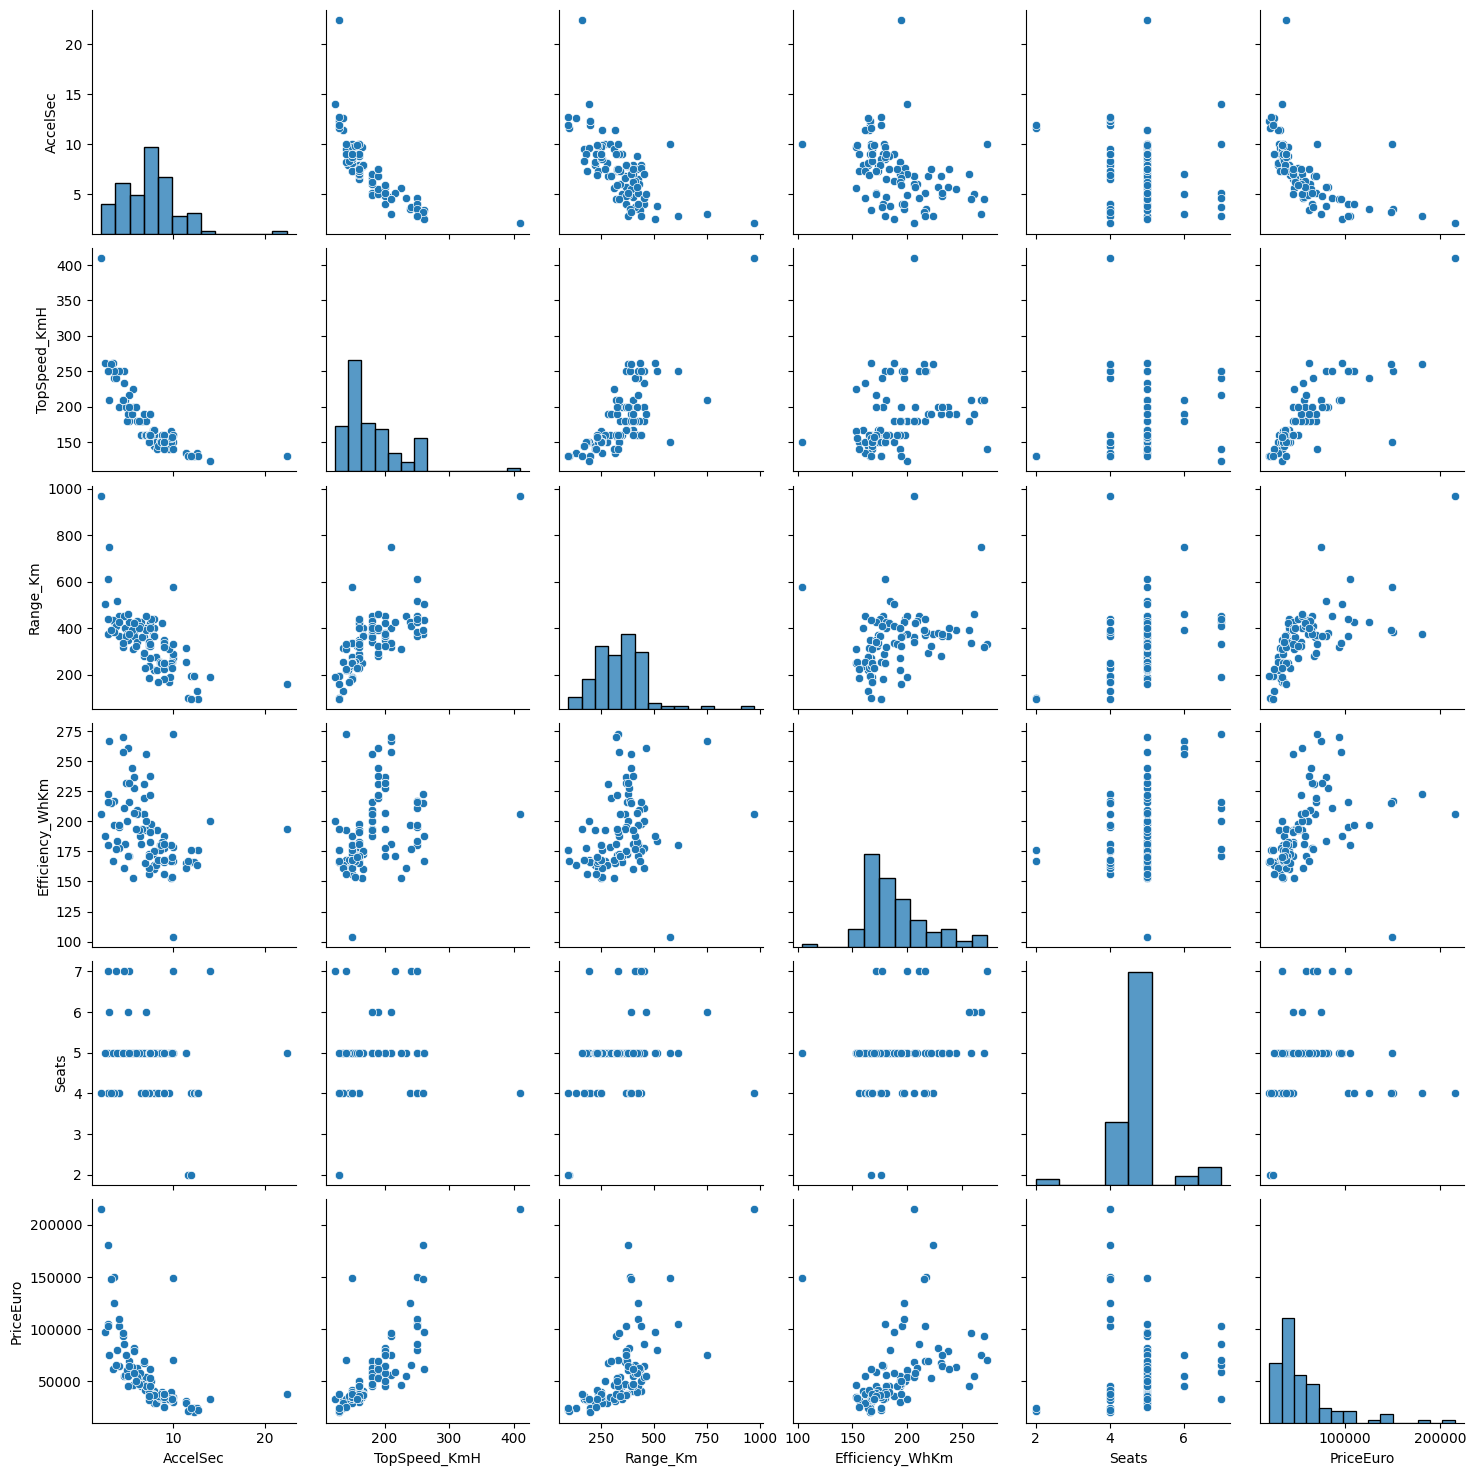

<ipython-input-3-d53e2e3bf2f2>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


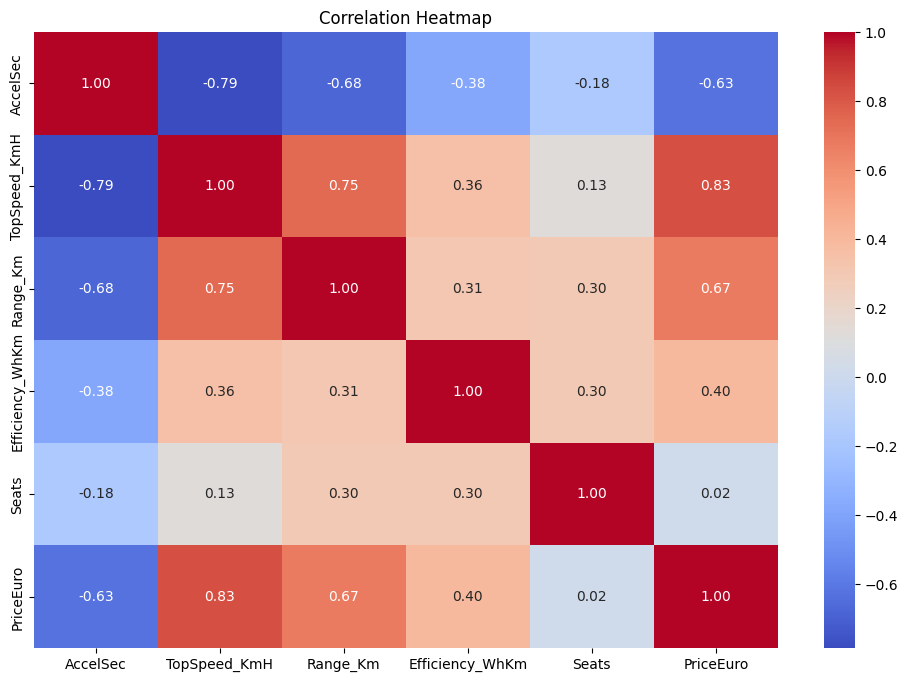

In [3]:
# Descriptive statistics
print(df.describe())

# Pairplot for numerical variables
sns.pairplot(df)
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Exploratory Data Analysis**

        AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm      Seats  \
count  98.000000     98.000000   98.000000        98.000000  98.000000   
mean    7.046939    181.653061  350.153061       189.867347   4.959184   
std     2.483895     43.248527  118.217984        30.055837   0.687418   
min     2.100000    123.000000  170.000000       104.000000   4.000000   
25%     5.100000    150.000000  258.750000       168.000000   5.000000   
50%     7.300000    167.000000  350.000000       181.000000   5.000000   
75%     8.950000    200.000000  407.500000       206.000000   5.000000   
max    14.000000    410.000000  970.000000       273.000000   7.000000   

           PriceEuro    Cluster  
count      98.000000  98.000000  
mean    57324.683673   1.265306  
std     34288.246370   0.666597  
min     20129.000000   0.000000  
25%     35000.000000   1.000000  
50%     45000.000000   1.000000  
75%     65465.000000   2.000000  
max    215000.000000   2.000000  


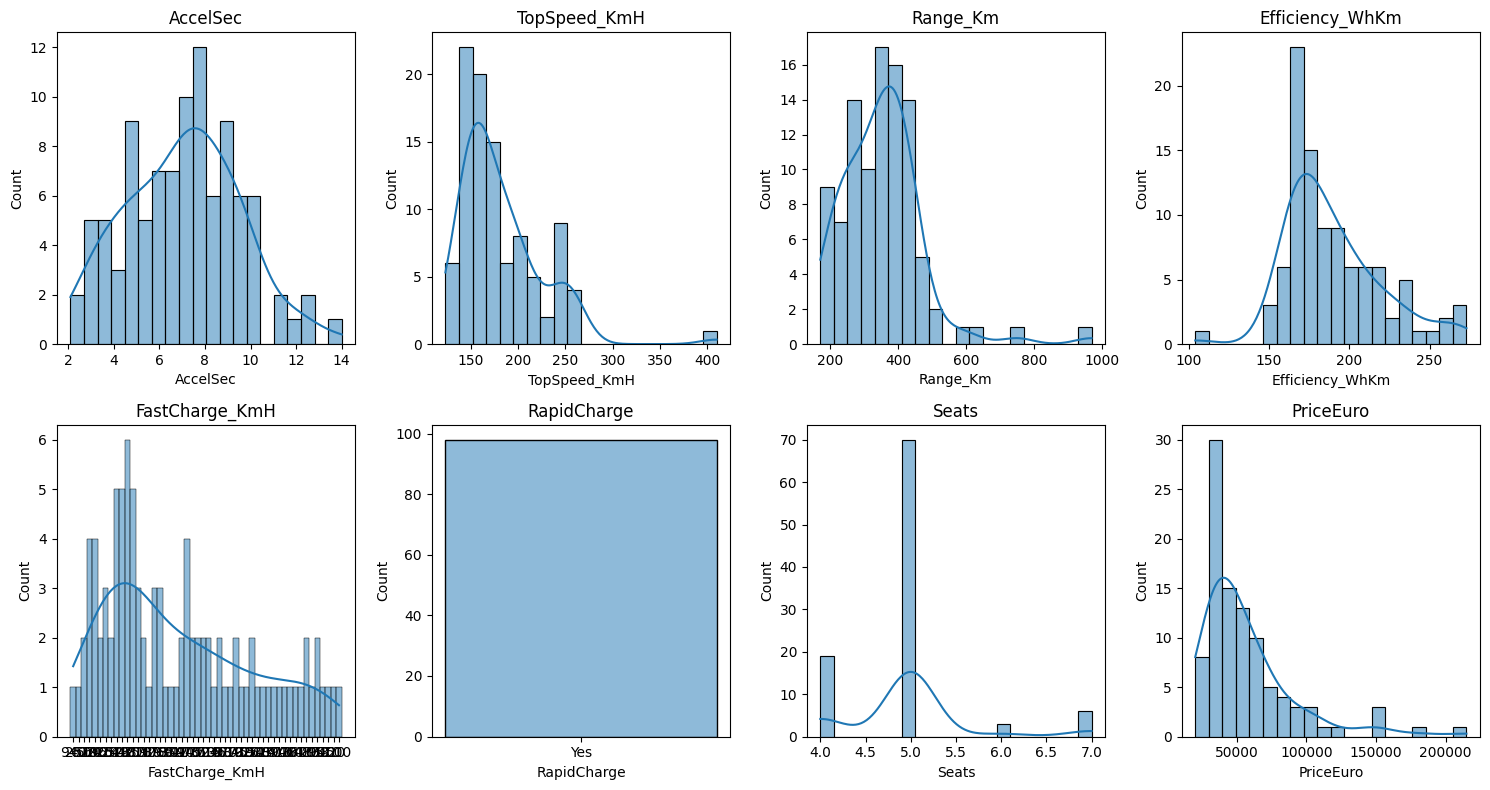

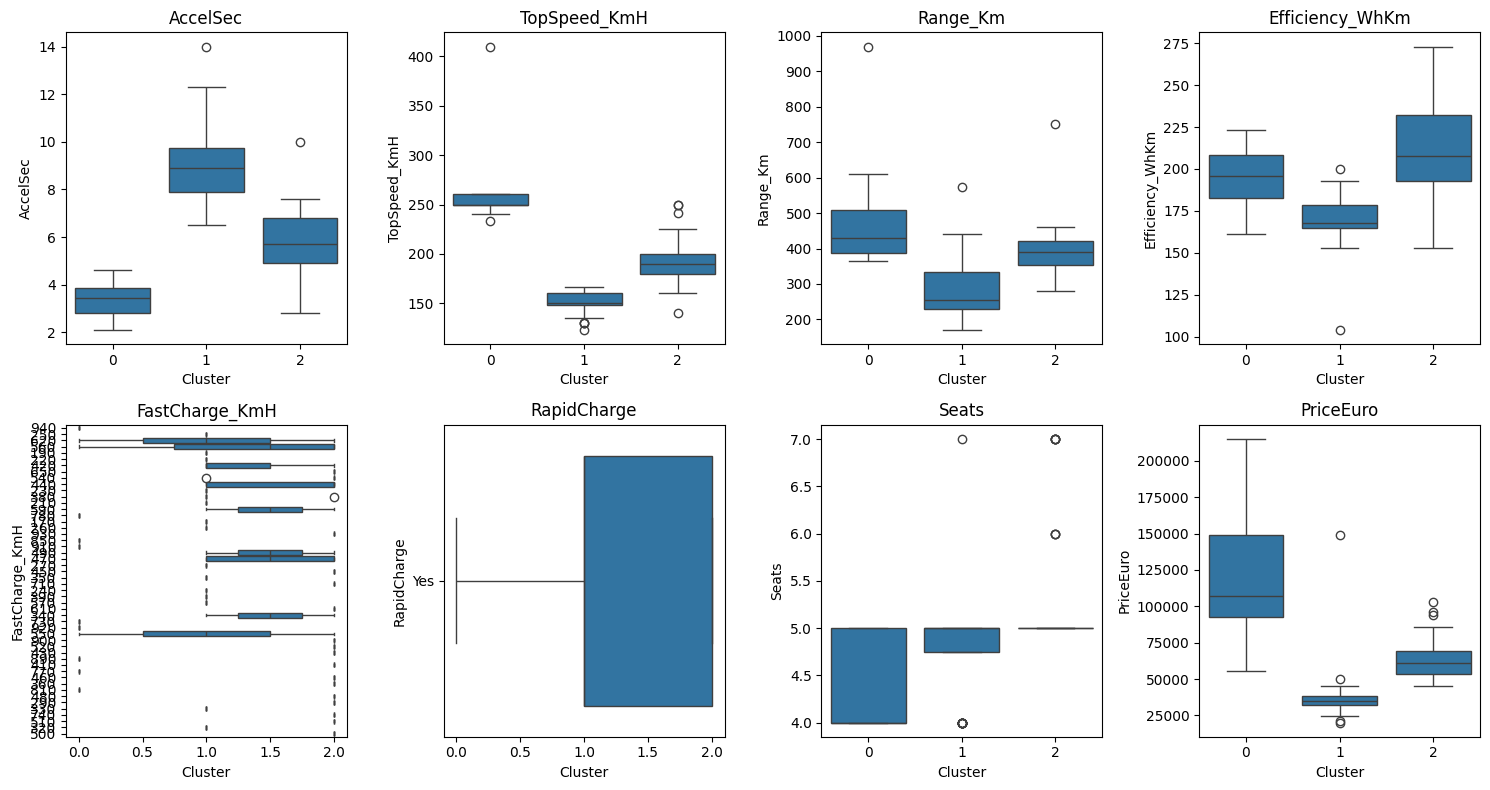

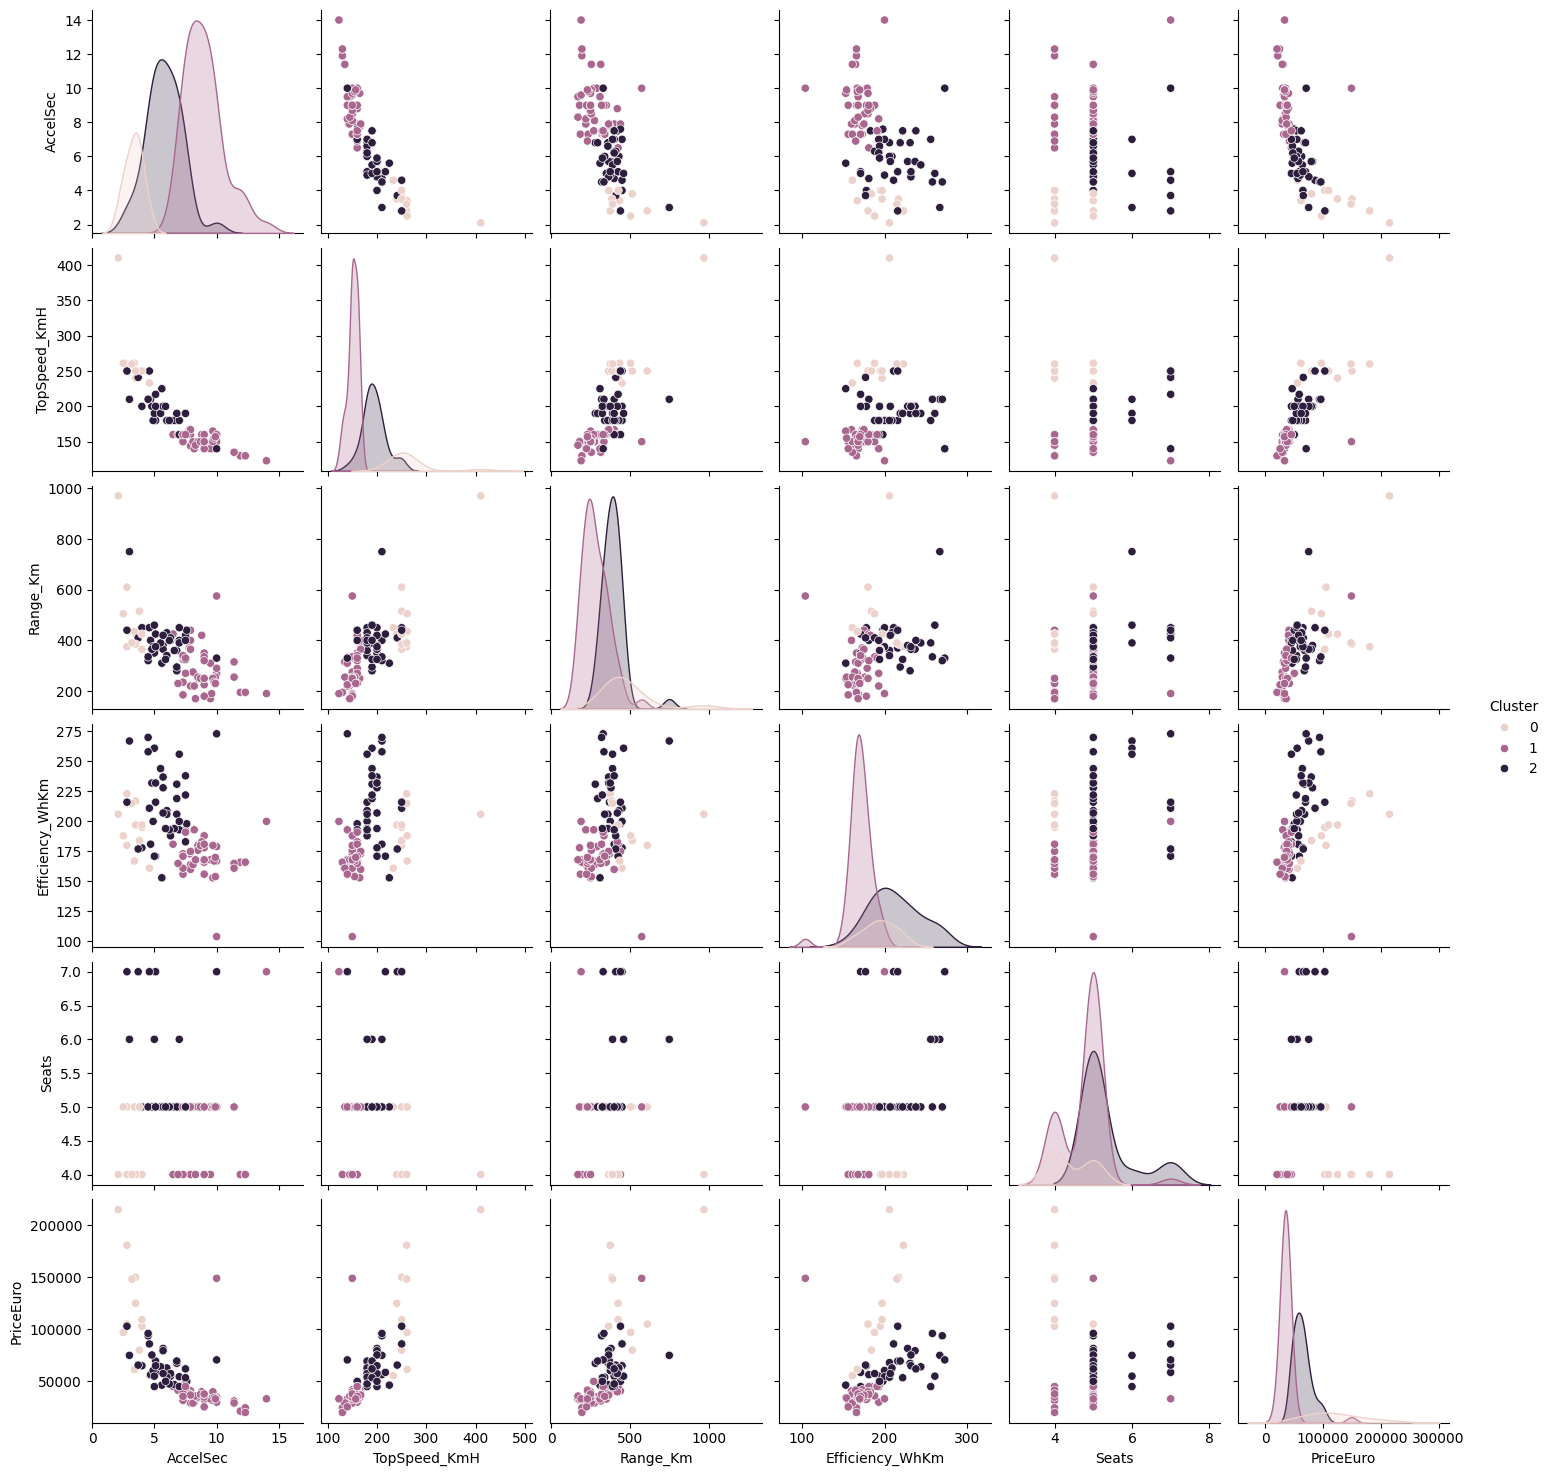

<ipython-input-8-632d51008ce0>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numeric.corr()


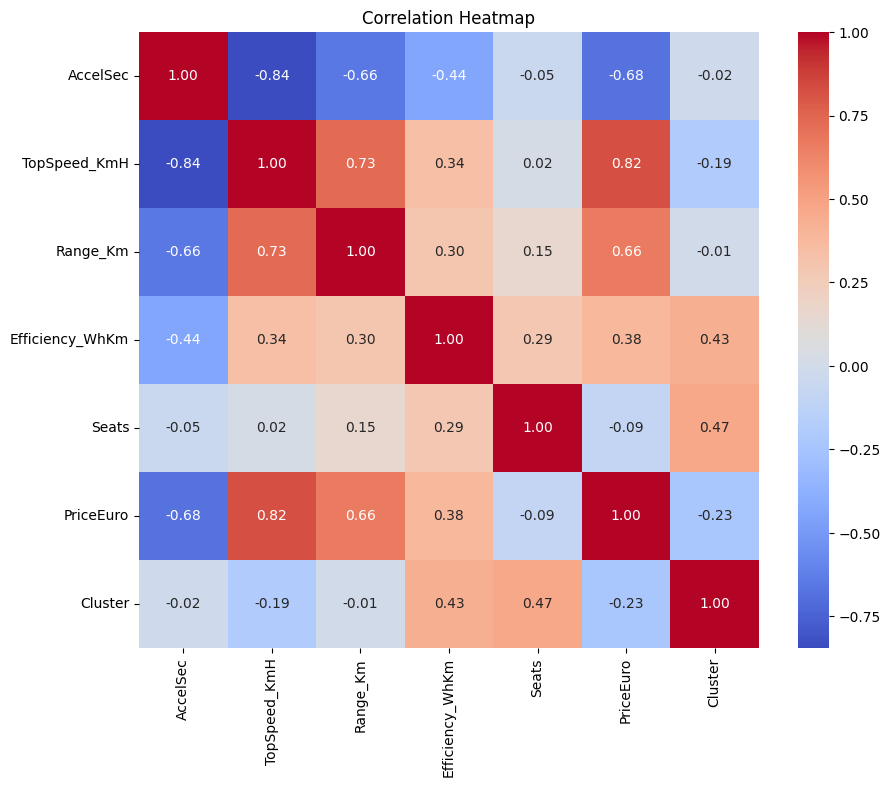

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic summary statistics
print(df_numeric.describe())

# Distribution of numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(df_numeric.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.histplot(df_numeric[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Boxplot for numerical features by cluster
plt.figure(figsize=(15, 8))
for i, col in enumerate(df_numeric.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Cluster', y=col, data=df_numeric)
    plt.title(col)
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df_numeric, hue='Cluster')
plt.show()

# Correlation heatmap
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Label Encoding **

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop non-numeric columns or encode them
df_numeric = df.drop(['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']:
    df[col] = label_encoder.fit_transform(df[col])

# Select numerical features for clustering
X = df_numeric[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal number of clusters and fit KMeans
n_clusters = 3  # Example: Choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
df_numeric['Cluster'] = kmeans.labels_

# Visualize the clusters
sns.pairplot(df_numeric, hue='Cluster')
plt.show()


**K Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

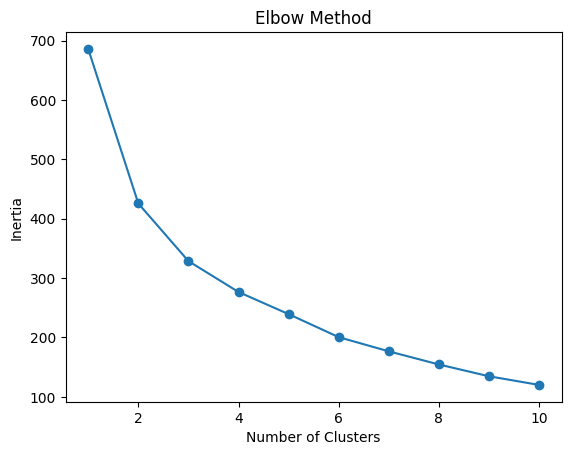

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


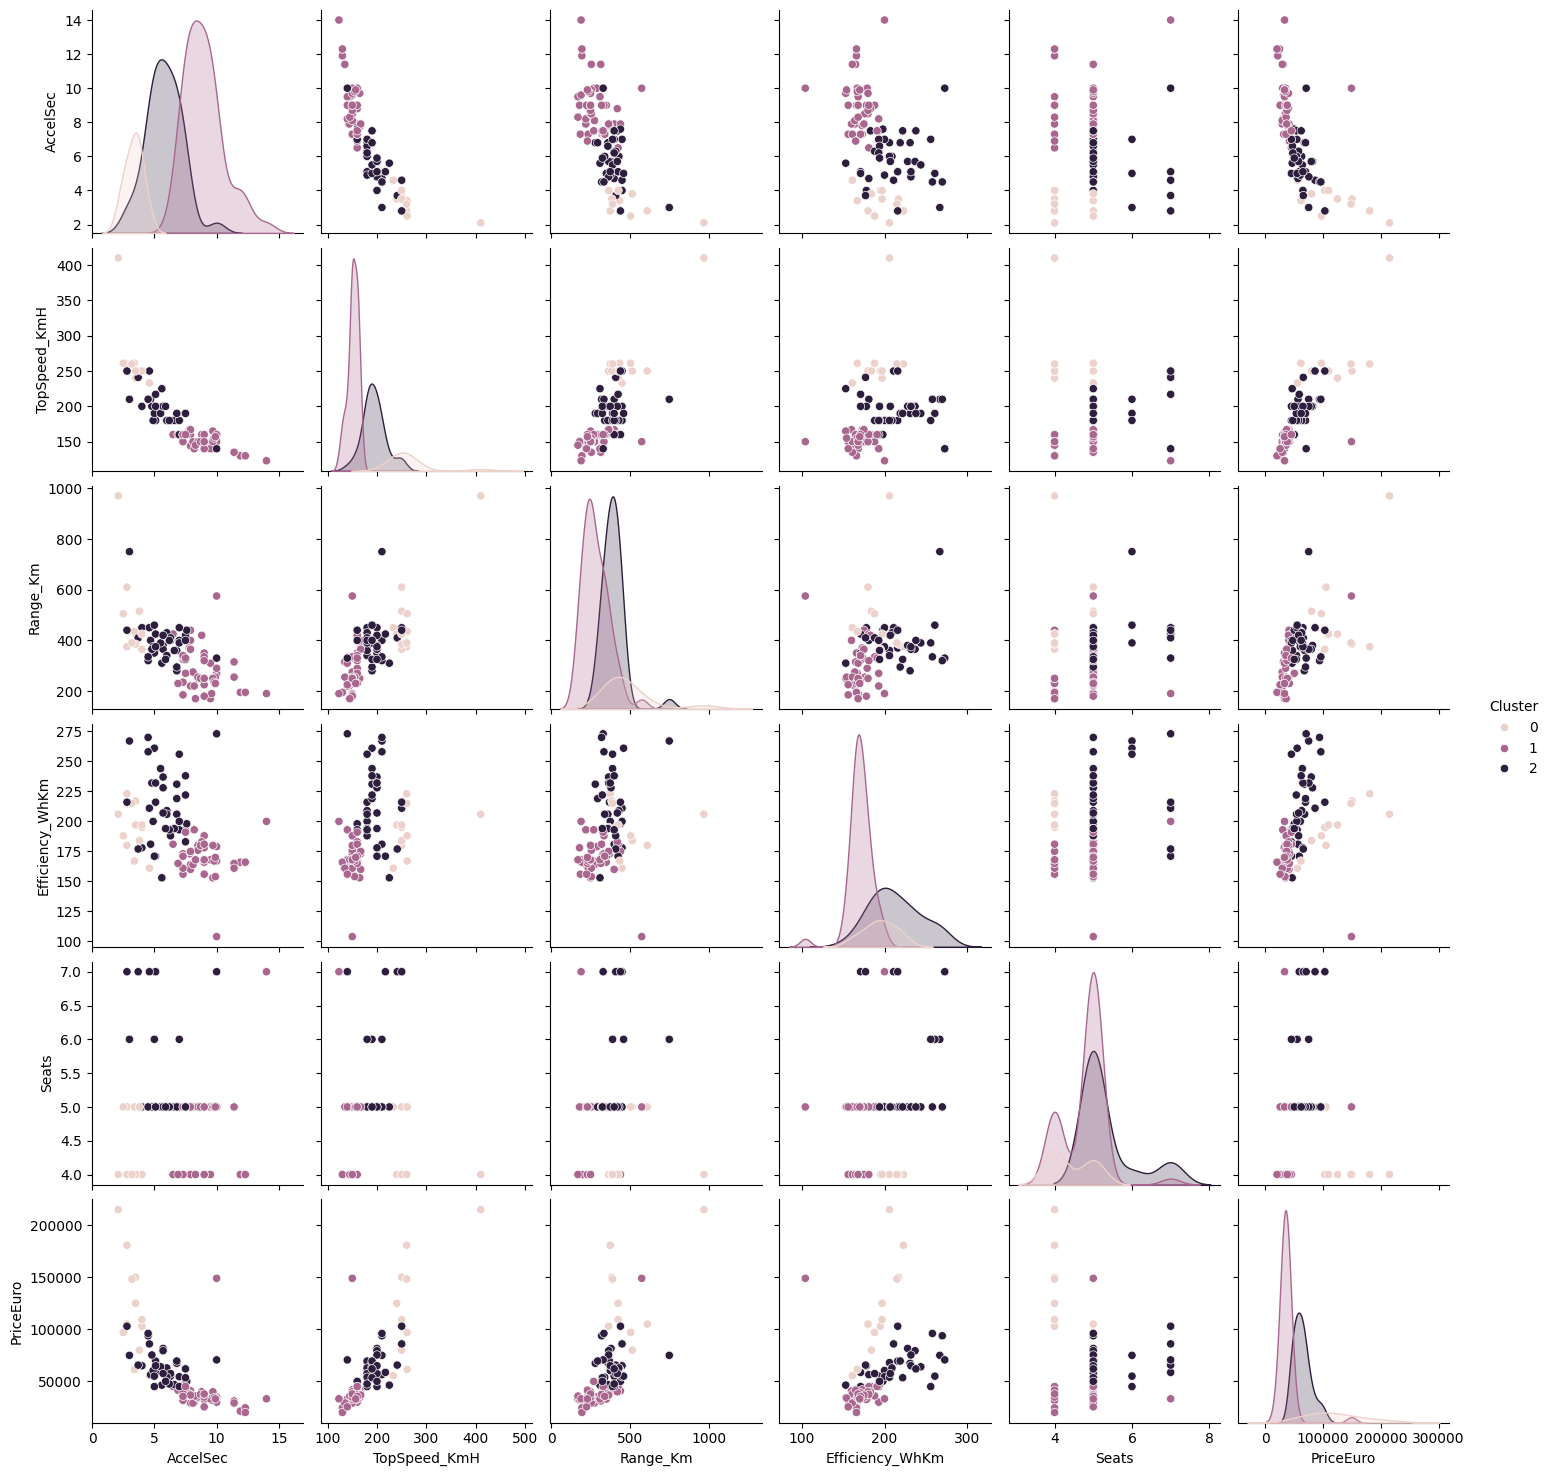

In [5]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
X = df_numeric[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']]

# Convert all non-numeric values to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
X.dropna(inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal number of clusters and fit KMeans
n_clusters = 3  # Example: Choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
df_numeric = df_numeric.loc[X.index]  # Match indices after dropping NaN rows
df_numeric['Cluster'] = kmeans.labels_

# Visualize the clusters
sns.pairplot(df_numeric, hue='Cluster')
plt.show()


**Gap Analysis**

In [ ]:
# Analyze cluster characteristics
cluster_means = df_numeric.groupby('Cluster').mean()
print(cluster_means)

# Identify gaps
# Example: Check the difference in mean values between clusters for important features
gap_analysis = cluster_means.diff().dropna()
print(gap_analysis)

# Formulate business model based on identified gaps
# Example: If a cluster has significantly lower range and higher price compared to other clusters,
# consider developing a more affordable EV with longer range to target that segment.


Gap Analysis:

There is a noticeable gap between Segment 2 and Segment 3 in terms of performance metrics such as acceleration and top speed, indicating an opportunity to develop mid-range EVs that offer a balance between performance and affordability.

Additionally, there appears to be a gap in pricing between Segment 1 and Segment 2, suggesting a potential opportunity to introduce premium features or enhance brand perception in Segment 1 to justify higher price points.

Business Implications:

Product Development: Manufacturers can use these insights to develop EVs tailored to the specific needs and preferences of each segment. For example, targeting Segment 1 with affordable yet feature-rich models, and Segment 2 with high-performance luxury EVs.

Marketing Strategies: Tailoring marketing campaigns to resonate with the unique characteristics of each segment can help maximize customer engagement and conversion rates. Messaging for Segment 2 may emphasize performance and luxury, while messaging for Segment 3 may focus on affordability and environmental benefits.

Partnerships and Collaborations: Exploring partnerships with charging infrastructure providers, government agencies, or other stakeholders can help address challenges specific to each segment, such as range anxiety or affordability barriers.

In conclusion, the application of K-means clustering has provided valuable insights into the segmentation of the EV market, enabling businesses to better understand their target audience, identify opportunities for growth, and formulate effective strategies to capitalize on them.